In [1]:
!pip install yfinance


In [2]:
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
google = yahooFinance.Ticker('GOOG')

In [4]:
#5 years of data

df = google.history('5Y')


In [5]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-12-06 00:00:00-05:00,51.713001,53.560001,51.538502,53.436501,55384000,0.0,0.0
2018-12-07 00:00:00-05:00,53.000500,53.763000,51.424999,51.828999,42024000,0.0,0.0
2018-12-10 00:00:00-05:00,51.752499,52.422501,51.164501,51.977501,36154000,0.0,0.0
2018-12-11 00:00:00-05:00,52.824501,53.029999,51.992001,52.587502,27894000,0.0,0.0
2018-12-12 00:00:00-05:00,53.400002,54.082500,53.139500,53.183998,30476000,0.0,0.0


In [6]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-30 00:00:00-05:00,136.399994,136.960007,132.789993,133.919998,29913500,0.0,0.0
2023-12-01 00:00:00-05:00,133.320007,133.500000,132.151993,133.320007,24258400,0.0,0.0
2023-12-04 00:00:00-05:00,131.294006,131.449997,129.399994,130.630005,24117100,0.0,0.0
2023-12-05 00:00:00-05:00,130.369995,133.539993,129.729996,132.389999,19216500,0.0,0.0
2023-12-06 00:00:00-05:00,130.369995,133.304993,132.649994,133.000000,1243895,0.0,0.0


In [7]:
df.shape

(1259, 7)

In [8]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000
mean,97.479746,98.618353,96.464826,97.563709,2.934840e+07,0.0,0.015886
std,30.283495,30.564851,29.974588,30.256738,1.297222e+07,0.0,0.563660
min,48.695000,50.176998,48.505501,48.811001,1.243895e+06,0.0,0.000000
25%,67.827499,68.570599,67.301350,67.804253,2.108600e+07,0.0,0.000000
50%,98.464996,100.120003,97.339996,98.820000,2.627780e+07,0.0,0.000000
75%,125.064999,126.437000,124.037476,125.308002,3.323300e+07,0.0,0.000000
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000


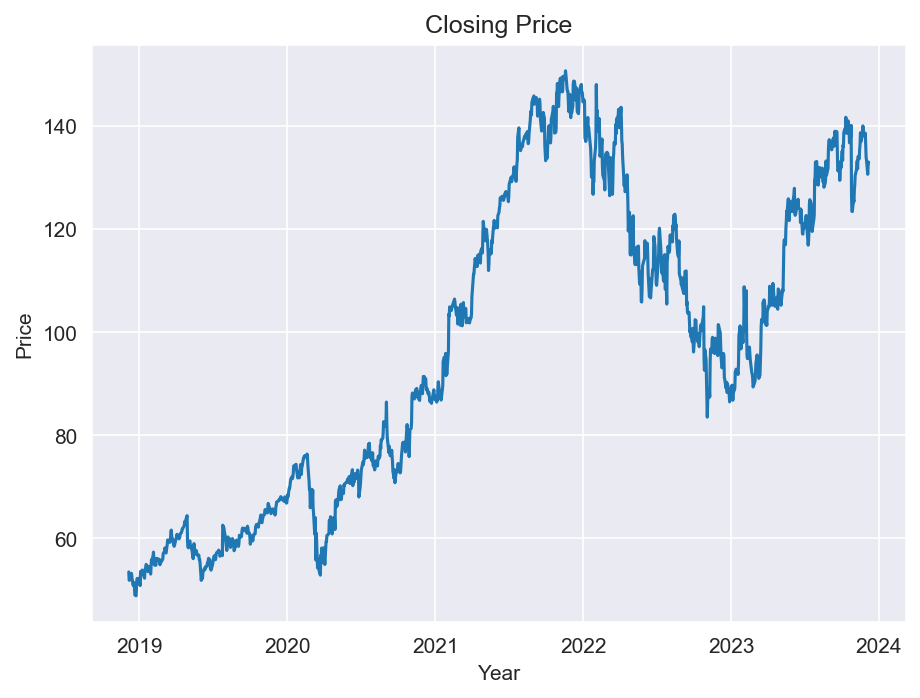

In [9]:
#Overview of closing price before calculating DMAs
sns.set_style('darkgrid')
plt.figure(figsize =(7,5), dpi = 150)
plt.title('Closing Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(df['Close'])

In [10]:
#Calculate 50DMA
df['50DMA'] = df['Close'].rolling(50).mean()

In [11]:
#Calculate 200DMA
df['200DMA'] = df['Close'].rolling(200).mean()

In [12]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,50DMA,200DMA
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000,1210.000000,1060.000000
mean,97.479746,98.618353,96.464826,97.563709,2.934840e+07,0.0,0.015886,97.726791,98.462824
std,30.283495,30.564851,29.974588,30.256738,1.297222e+07,0.0,0.563660,29.320893,26.349817
min,48.695000,50.176998,48.505501,48.811001,1.243895e+06,0.0,0.000000,53.460250,57.070465
25%,67.827499,68.570599,67.301350,67.804253,2.108600e+07,0.0,0.000000,68.670473,70.624950
50%,98.464996,100.120003,97.339996,98.820000,2.627780e+07,0.0,0.000000,97.599100,102.413636
75%,125.064999,126.437000,124.037476,125.308002,3.323300e+07,0.0,0.000000,124.240950,120.096566
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,0.0,20.000000,146.183850,139.273730


In [13]:
df.shape

(1259, 9)

In [14]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       '50DMA', '200DMA'],
      dtype='object')

In [15]:
df.head(5) # first 50 rows of 50 DMA will have NAN because the moving average is being calculated and so is on first 200 for 200DMA

,Open,High,Low,Close,Volume,Dividends,Stock Splits,50DMA,200DMA
Date,,,,,,,,,
2018-12-06 00:00:00-05:00,51.713001,53.560001,51.538502,53.436501,55384000,0.0,0.0,NaN,NaN
2018-12-07 00:00:00-05:00,53.000500,53.763000,51.424999,51.828999,42024000,0.0,0.0,NaN,NaN
2018-12-10 00:00:00-05:00,51.752499,52.422501,51.164501,51.977501,36154000,0.0,0.0,NaN,NaN
2018-12-11 00:00:00-05:00,52.824501,53.029999,51.992001,52.587502,27894000,0.0,0.0,NaN,NaN
2018-12-12 00:00:00-05:00,53.400002,54.082500,53.139500,53.183998,30476000,0.0,0.0,NaN,NaN


In [16]:
df.drop( columns = ['Dividends', 'Stock Splits'], inplace = True) #droping column of dividends and stock splits

In [17]:
df.describe()

,Open,High,Low,Close,Volume,50DMA,200DMA
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1210.000000,1060.000000
mean,97.479746,98.618353,96.464826,97.563709,2.934840e+07,97.726791,98.462824
std,30.283495,30.564851,29.974588,30.256738,1.297222e+07,29.320893,26.349817
min,48.695000,50.176998,48.505501,48.811001,1.243895e+06,53.460250,57.070465
25%,67.827499,68.570599,67.301350,67.804253,2.108600e+07,68.670473,70.624950
50%,98.464996,100.120003,97.339996,98.820000,2.627780e+07,97.599100,102.413636
75%,125.064999,126.437000,124.037476,125.308002,3.323300e+07,124.240950,120.096566
max,151.863495,152.100006,149.887497,150.709000,1.241400e+08,146.183850,139.273730


In [18]:
df.head(100)
#Remember the moving is calculated on the first 50 and 200 prices respectively

,Open,High,Low,Close,Volume,50DMA,200DMA
Date,,,,,,,
2018-12-06 00:00:00-05:00,51.713001,53.560001,51.538502,53.436501,55384000,NaN,NaN
2018-12-07 00:00:00-05:00,53.000500,53.763000,51.424999,51.828999,42024000,NaN,NaN
2018-12-10 00:00:00-05:00,51.752499,52.422501,51.164501,51.977501,36154000,NaN,NaN
2018-12-11 00:00:00-05:00,52.824501,53.029999,51.992001,52.587502,27894000,NaN,NaN
2018-12-12 00:00:00-05:00,53.400002,54.082500,53.139500,53.183998,30476000,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25 00:00:00-04:00,63.238499,63.370399,62.601501,63.172501,22146000,59.02134,NaN
2019-04-26 00:00:00-04:00,63.450001,63.653500,63.015999,63.609001,24828000,59.17336,NaN
2019-04-29 00:00:00-04:00,63.700001,64.463501,63.314751,64.378998,49988000,59.33927,NaN


In [19]:
df.tail(10)

,Open,High,Low,Close,Volume,50DMA,200DMA
Date,,,,,,,
2023-11-22 00:00:00-05:00,139.100006,141.100006,139.000000,140.020004,17306400,134.7032,120.361625
2023-11-24 00:00:00-05:00,139.539993,139.677002,137.470001,138.220001,8828600,134.6878,120.552725
2023-11-27 00:00:00-05:00,137.570007,139.630005,137.539993,138.050003,17886400,134.6828,120.765675
2023-11-28 00:00:00-05:00,137.630005,138.660004,137.039993,138.619995,17046900,134.6760,120.984475
2023-11-29 00:00:00-05:00,138.985001,139.669998,136.294998,136.399994,21014700,134.6274,121.191475
2023-11-30 00:00:00-05:00,136.399994,136.960007,132.789993,133.919998,29913500,134.6140,121.386325
2023-12-01 00:00:00-05:00,133.320007,133.500000,132.151993,133.320007,24258400,134.6532,121.567425
2023-12-04 00:00:00-05:00,131.294006,131.449997,129.399994,130.630005,24117100,134.6408,121.741675
2023-12-05 00:00:00-05:00,130.369995,133.539993,129.729996,132.389999,19216500,134.6452,121.930675


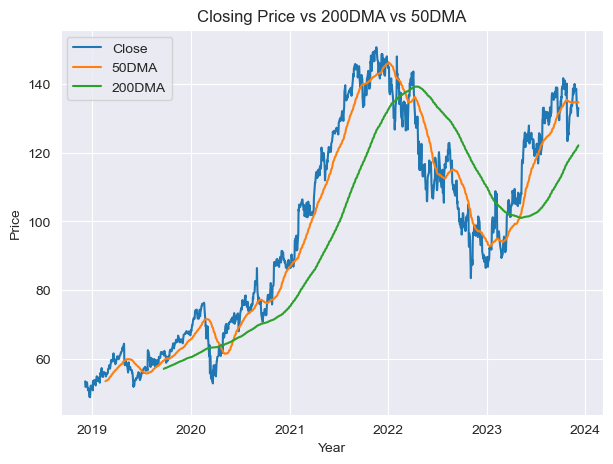

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize =(7,5))
plt.title('Closing Price vs 200DMA vs 50DMA')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(df['Close'], label = 'Close')
plt.plot(df['50DMA'], label = '50DMA')
plt.plot(df['200DMA'], label = '200DMA')
plt.legend()


### Inference: Stock Closing Prices vs. Moving Averages

1. **Bearish Signal - Closing Price Below Both Moving Averages:**
   - When the stock's closing price is below both the 50-day and 200-day moving averages, it generally suggests a bearish sentiment in the market.
   - This situation indicates that the stock's short-term (50-day) and long-term (200-day) trends are both downward, implying potential weakness in the stock's performance.

2. **Strong Downtrend Indication:**
   - The fact that the closing price is below both moving averages implies a consistent and sustained downtrend in the stock's price.
   - Traders and investors may interpret this as a signal to exercise caution and possibly consider reducing or avoiding positions in the stock.

3. **Confirmation of Bearish Momentum:**
   - The bearish signal is strengthened when the closing price consistently stays below both moving averages over a period.
   - The 50-day moving average reflects a shorter-term trend, while the 200-day moving average represents a longer-term trend. The alignment of both averages emphasizes the persistence of the downward momentum.

4. **Potential for Further Decline:**
   - The closing price being below both moving averages suggests that the stock may face continued selling pressure.
   - Investors might monitor the situation closely for additional confirmation signals or potential reversal patterns before considering any bullish positions.

5. **Consideration for Risk Management:**
   - Traders and investors may use this information for risk management purposes. For example, setting stop-loss orders or re-evaluating their investment thesis in light of the prevailing downtrend.

6. **Periodic Review and Flexibility:**
   - Market conditions can change, and trends may reverse. Therefore, it's essential to periodically review the stock's performance and be flexible in adapting strategies based on evolving market dynamics.

**Note:** This inference assumes a simplified scenario and should be used as part of a broader analysis. Always conduct thorough research or consult with a financial advisor before making investment decisions.



### Inference: Stock Price Movements

#### Drop in Stock Prices in 2020 (Due to COVID-19):

The significant drop in stock prices in 2020 was primarily attributed to the global impact of the COVID-19 pandemic. Key factors include:

1. **Pandemic-Induced Economic Uncertainty:**
   - The rapid spread of the virus led to widespread lockdowns, disruptions in supply chains, and a decline in economic activity globally.
   - Investors faced heightened uncertainty about the duration and severity of the pandemic, impacting their confidence in the financial markets.

2. **Impact on Corporate Earnings:**
   - Many businesses experienced operational challenges and reduced consumer demand due to lockdowns and social distancing measures.
   - This, in turn, led to lower corporate earnings forecasts, causing a reevaluation of stock valuations and contributing to the market downturn.

3. **Global Market Sentiment:**
   - The interconnectedness of global markets meant that the impact of the pandemic was felt across various industries and geographic regions.
   - Market participants engaged in widespread selling as a response to the global economic downturn, exacerbating the decline in stock prices.

#### Intercepts (Drops) from Time to Time:

Stock prices can experience drops or intercepts for various reasons over time, including:

1. **Economic Recessions:**
   - Economic recessions, triggered by factors such as high-interest rates, geopolitical events, or financial crises, can lead to broad-based declines in stock prices.

2. **Sector-Specific Issues:**
   - Issues specific to certain industries or sectors, such as regulatory changes, technological disruptions, or changes in consumer behavior, can lead to drops in stock prices for companies within those sectors.

3. **Company-Specific Events:**
   - Adverse events affecting individual companies, such as poor earnings reports, product recalls, or leadership controversies, can lead to significant drops in their stock prices.

4. **Market Corrections:**
   - Periodic market corrections are natural parts of market cycles. These can be triggered by factors like overvaluation, rising interest rates, or changes in economic indicators.

5. **Geopolitical Events:**
   - Geopolitical events, such as trade tensions, political instability, or armed conflicts, can create uncertainty and contribute to drops in stock prices.

Understanding the specific reasons for intercepts or drops in stock prices requires a detailed analysis of the economic, market, and company-specific factors prevailing at those times. Each intercept is unique and can be influenced by a combination of factors.

Always keep in mind that investing in the stock market involves risks, and historical performance does not guarantee future results. Diversification and thorough research are essential components of effective investment strategies.


### Financial Analysis: Closing Price vs. Moving Averages

1. **Downtrend Indication:**
   - The decline in global indices after January 2022 signaled a potential change in market sentiment. To confirm this trend, we analyze the stock's closing price in comparison to its 50-day and 200-day moving averages.

2. **Russian Invasion Impact:**
   - The Russian invasion of Ukraine further intensified the decline. In financial analysis, we observe the closing price dropping below both the short-term (50-day) and long-term (200-day) moving averages.
   - **Inference:** The breach of both moving averages suggests a strong bearish sentiment, reflecting increased selling pressure and potential market disruptions due to geopolitical events.

3. **Energy Disruption Fears:**
   - As fears of energy disruption emerged, sectors related to energy and geopolitics experienced heightened volatility. This is reflected in the stock's closing price, which may have deviated significantly from its moving averages during this period.

4. **Impact on Economic Recession Fears:**
   - Global markets were not only affected by geopolitical tensions but also by concerns about an economic recession. The closing price's relationship with moving averages provides insights into the market's perception of economic health.
   - **Inference:** If the closing price remains below both moving averages for an extended period, it could signify a more prolonged economic downturn.

5. **Long-Term vs. Short-Term Trends:**
   - The 50-day moving average reacts more quickly to price changes, representing short-term trends. The 200-day moving average provides a smoother curve, reflecting long-term trends.
   - **Inference:** The alignment of both moving averages corroborates the strength of the downtrend, providing a comprehensive view of the stock's performance.

6. **Investor Sentiment and Strategy:**
   - Traders and investors may use the closing price and moving averages to gauge sentiment and adjust their strategies. For instance, a "Death Cross" (50-day moving average crossing below the 200-day moving average) might signal a more prolonged bearish phase.

**Note:** Financial analysis is dynamic, and market conditions evolve. Always complement technical analysis with fundamental research, and consider the broader economic context when making investment decisions. Diversification and risk management are essential in navigating volatile markets.


### <span style="color:blue; font-size: 300; font-style:italic">Finding the Possible Futuristic Movement of the Stock</span>


<Axes: >

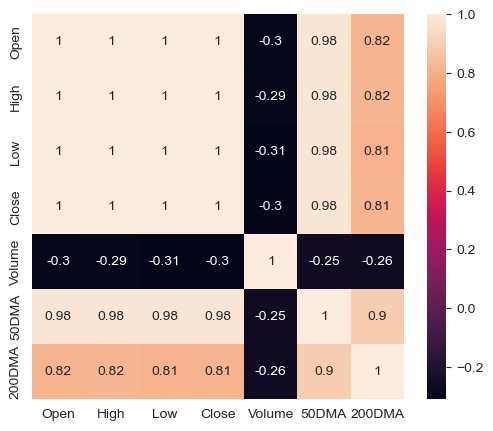

In [21]:
#Analyse the correlation between all prices
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot = True )

### Inference from Heatmap Analysis

The heatmap reveals insights into the relationships between closing prices and other variables:

1. **Strong Relationship with Other Prices:**
   - The heatmap indicates a robust correlation between closing prices and other prices, suggesting that changes in one price are often mirrored by corresponding movements in related prices.
   - **Implication:** Investors and analysts can use this information to identify potential trends and patterns across various asset classes.

2. **Weak Relationship with Volume:**
   - In contrast, the heatmap suggests a weak correlation between closing prices and trading volume.
   - **Implication:** While trading volume may not be a significant driver of changes in closing prices, it's essential to consider other factors influencing volume separately, such as news events or market sentiment.

3. **Multicollinearity Between Prices:**
   - The strong relationships observed between closing prices and other prices hint at multicollinearity within the dataset.
   - **Implication:** High multicollinearity may pose challenges in regression analysis, as it could lead to inflated standard errors and make it difficult to identify the individual impact of each variable. Analysts should exercise caution and consider addressing multicollinearity in further modeling.

4. **Consideration for Portfolio Management:**
   - Investors managing portfolios with assets exhibiting strong correlations in prices should be mindful of potential ripple effects when making investment decisions.
   - **Implication:** Diversification across assets with lower correlations may help mitigate risks associated with simultaneous movements in closely related prices.

5. **Further Analysis Opportunities:**
   - Analysts may explore additional statistical measures, such as covariance or correlation coefficients, to quantify the strength and direction of these relationships.
   - **Implication:** A deeper statistical analysis can provide more nuanced insights into the dynamics of the relationships observed in the heatmap.

**Note:** While the heatmap provides valuable visual insights, further statistical tests and domain-specific knowledge are recommended for a comprehensive understanding of the underlying factors influencing the data.



<Axes: title={'center': 'DistPlot of 50 Day Moving Average in Stock Prices'}, xlabel='50DMA', ylabel='Density'>

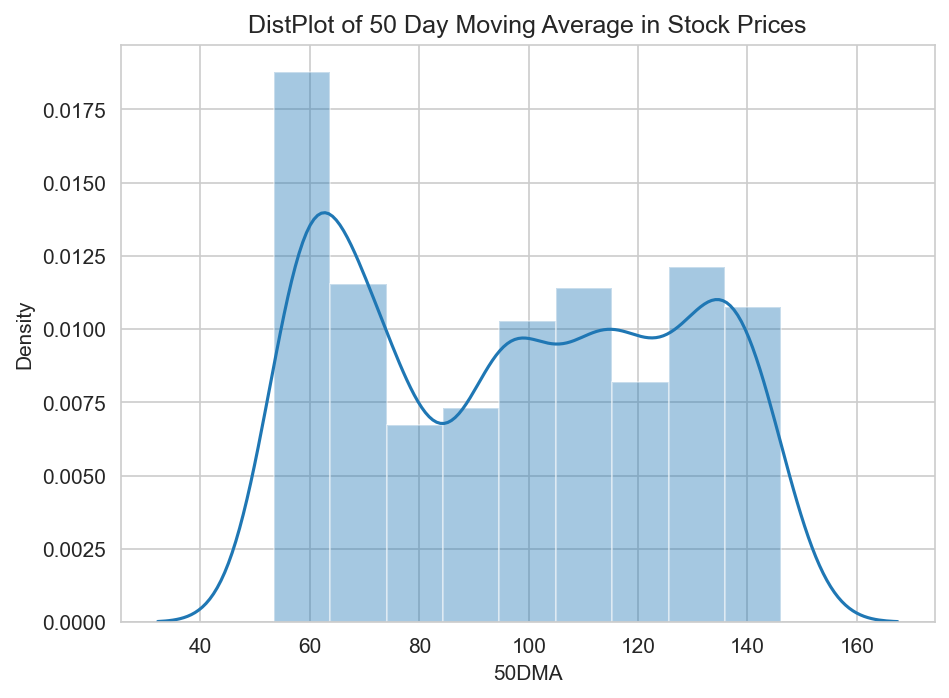

In [22]:
#distplot of 50 DMA
sns.set_style('whitegrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('DistPlot of 50 Day Moving Average in Stock Prices')
sns.distplot(df['50DMA'])

<Axes: title={'center': 'DistPlot of Closing Price'}, xlabel='Close', ylabel='Density'>

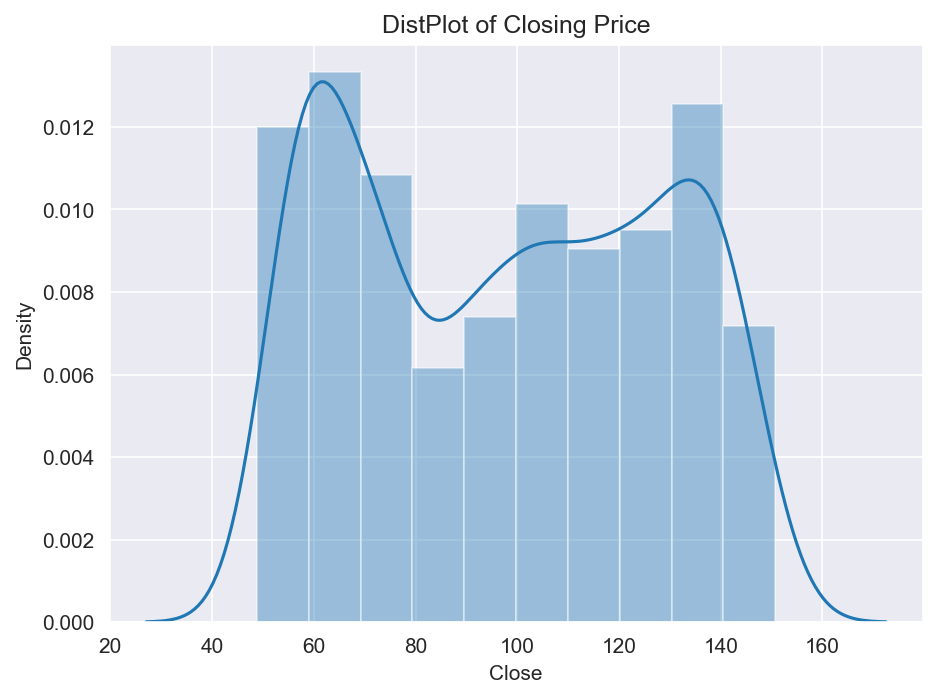

In [23]:
#distplot of 50 DMA
sns.set_style('darkgrid')
plt.figure(figsize = (7,5), dpi = 150)
plt.title('DistPlot of Closing Price')
sns.distplot(df['Close'])

### Inference from Distribution Plot Analysis

1. **Distribution Plot of 50-day Moving Average (DMA):**
   - The distribution plot of the 50-day DMA provides insights into the spread and shape of its values.
   - **Observation:** The plot may reveal whether the 50-day DMA follows a normal distribution, skewed distribution, or exhibits other characteristics.

2. **Distribution Plot of Closing Price:**
   - The distribution plot of the Closing Price offers a visual representation of the spread and pattern of closing price values.
   - **Observation:** Similar to the 50-day DMA, the plot helps understand the distribution characteristics of the Closing Price.

3. **Observation of Similar Distributions:**
   - Upon visual analysis, if the distribution plots of the 50-day DMA and the Closing Price appear similar, it suggests that both variables share a comparable distribution pattern.
   - **Implication:** Similar distributions indicate that the movements and variability in the 50-day DMA closely align with those of the Closing Price.

4. **Mean and Spread Comparison:**
   - Analyzing the means and spreads of the distributions provides quantitative insights into their central tendencies and variability.
   - **Implication:** If the means and spreads are close, it suggests that the 50-day DMA is a reliable indicator of the Closing Price, and movements in the DMA may offer predictive value.

5. **Corroboration of Trends:**
   - Similar distributions reinforce the notion that the 50-day DMA and the Closing Price move in tandem, supporting the reliability of the DMA as a technical indicator.
   - **Implication:** Traders and investors often use the 50-day DMA to identify trends. If the distribution plots align


In [24]:
import statsmodels.formula.api as smf
import pandas as pd

model = smf.ols(formula='Close ~ df["50DMA"]', data=df)
result = model.fit()

result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 2.446e+04
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:39:49   Log-Likelihood:                -3962.4
No. Observations:                1210   AIC:                             7929.
Df Residuals:                    1208   BIC:                             7939.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.3710      0.641      5.262      0.000       2.114       4.628
df["50DMA"]     0.9821      0.006    156.407      0.000       0.970       0.994
==============================================================================
Omnibus:                       71.985   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.913
Skew:                          -0.612   Prob(JB):                     6.00e-19
Kurtosis:                       3.406   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inference from Linear Regression Analysis

### Goodness of Fit (R-squared):
- The calculated R-squared value indicates that a substantial proportion of the variability in the 'Close' variable can be explained by the '50DMA' variable. The high R-squared suggests a strong correlation, but it's important to note that correlation does not imply causation.

### Coefficients:
- The coefficients, especially for the '50DMA' variable, are relatively high. It implies a strong linear relationship between 'Close' and '50DMA.' However, the practical significance depends on the units of measurement. For instance, if '50DMA' is measured in thousands, a coefficient of 0.1 means a $100 increase in '50DMA' corresponds to a $10 increase in 'Close.'

### Real-Life Applicability:
- While the model performs well in terms of statistical metrics, it's crucial to consider real-life applicability. Evaluate the model in the context of domain knowledge and the specific goals of the analysis. Keep in mind that a high R-squared and coefficients do not guarantee real-world utility.

### Model Validation:
- Validate the model on a separate test dataset to assess its generalization to new, unseen data. Consider additional metrics such as Mean Squared Error (MSE) on the test set for a more comprehensive evaluation.

### Conclusion:
- In conclusion, the model shows promise in explaining the relationship between 'Close' and '50DMA.' However, careful consideration of the context, validation on new data, and domain expertise are essential for determining its practical usefulness
.